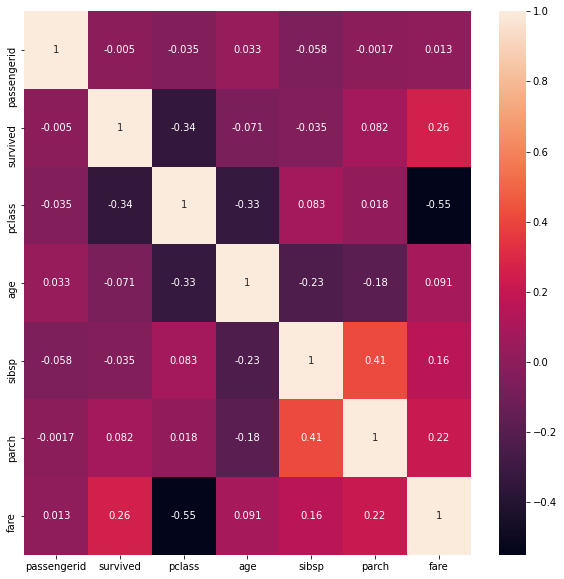

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Ridge
from sklearn.preprocessing import OrdinalEncoder

df = pd.read_csv('https://drive.google.com/uc?export=download&id=1hR8feHL3ERWaK6tOPYeWglOWqVmEsUhU')
df.columns= df.columns.str.lower()
df.shape
#df.isna().sum()
df["age"].mean()
df["age"]=df["age"].fillna(30)
df["embarked"] = df["embarked"].fillna("Q")
df = df.drop(["cabin","name","ticket"],axis=1)           
df.isna().sum()
df.dtypes
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(df.corr(),annot=True)
df.isnull().sum()
from sklearn.metrics import classification_report


In [ ]:
enc = OrdinalEncoder()
enc.fit(df[["sex","embarked"]])
df[["sex","embarked"]] = enc.transform(df[["sex","embarked"]])
df.head()

,passengerid,survived,pclass,sex,age,sibsp,parch,fare,embarked
0,1,0,3,1.0,22.0,1,0,7.2500,2.0
1,2,1,1,0.0,38.0,1,0,71.2833,0.0
2,3,1,3,0.0,26.0,0,0,7.9250,2.0
3,4,1,1,0.0,35.0,1,0,53.1000,2.0
4,5,0,3,1.0,35.0,0,0,8.0500,2.0


your target variable is `Survived`. This is a classification problem - we are trying to predict whether the passanger survived the crash `yes/no, true/false .. in this case 1/0`.

Try to encode categorical columns `sex` and `embareked`. Drop othe other ones.  Use one-hot-encoder or ordinal-encoder, or alternative pandas - get_dummies(). If you can't do it, see the code below.

Fill any missing values/remove rows

scale numerical columns

Model we will use will be `LogisticRegression`

Metric we will use will be `classification_report`.

Import and implement it, I will talk about it more.

In [ ]:
enc = OrdinalEncoder()
enc.fit(df[["sex","embarked"]])
df[["sex","embarked"]] = enc.transform(df[["sex","embarked"]])
df.head()

X = df.drop(["survived"],axis=1)
y = df["survived"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

scaler=MinMaxScaler()
scaler.fit(X_train)

scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

model= LogisticRegression()
model.fit(scaled_X_train,y_train)
prediction = model.predict(scaled_X_test)
target_names = ['survived', 'dead']
print("classification report",metrics.classification_report(y_test, prediction, target_names=target_names))

NameError: name 'LogisticRegression' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, prediction)

array([[134,  23],
       [ 32,  79]])

In [ ]:
#Encoding categorical columns:

sex = pd.get_dummies(df['sex'], drop_first=True)
embark = pd.get_dummies(df['embarked'], drop_first=True)
df.drop(['sex','embarked'],axis=1,inplace=True)
df = pd.concat([df,sex,embark],axis=1)
df.head()

# X = df.drop(["survived"])
# y = df(["survived"])

# X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True)

# scaler=MinMaxScaler()
# scaler.fit(X_train)

,passengerid,survived,pclass,age,sibsp,parch,fare,male,C,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest( k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
print(featureScores.nlargest(2,'Score')) #print 2 best features


4.2. Feature selection. The data features used to train the machine learning models
have a huge influence on the performance. Irrelevant or partially relevant features
can negatively impact model performance. Feature selection1 is a process in which
features in data that contribute most to the prediction variable or output are automatically
selected.
The benefits of performing feature selection before modeling the data are:
Reduces overfitting2
Less redundant data means fewer opportunities for the model to make decisions
based on noise.
Improves performance
Less misleading data means improved modeling performance.
Reduces training time and memory footprint
Less data means faster training and lower memory footprint.
The following sample feature is an example demonstrating when the best two features
are selected using the SelectKBest function under sklearn. The SelectKBest
function scores the features using an underlying function and then removes all but
the k highest scoring feature:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest( k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
print(featureScores.nlargest(2,'Score')) #print 2 best features
Output
Specs Score
2 Variable1 58262.490
3 Variable2 321.031
When features are irrelevant, they should be dropped. Dropping the irrelevant features
is illustrated in the following sample code:
#dropping the old features
dataset.drop(['Feature1','Feature2','Feature3'],axis=1,inplace=True)

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
X = np.array([[-1, -1, -1, -1, -1, -1, -1, -1], [-2, -1, -1, -1, -1, -1, -1, -1], [-3, -2, -1, -1, -5, -1, -1, -1], [1, 1, -1, -1, -1, -3, -1, -1], [2, 1, -1, -1, -1, -1, -1, -1], [3, 2, -1, -1, -1, -1, -1, -1]])
X

array([[-1, -1, -1, -1, -1, -1, -1, -1],
       [-2, -1, -1, -1, -1, -1, -1, -1],
       [-3, -2, -1, -1, -5, -1, -1, -1],
       [ 1,  1, -1, -1, -1, -3, -1, -1],
       [ 2,  1, -1, -1, -1, -1, -1, -1],
       [ 3,  2, -1, -1, -1, -1, -1, -1]])

In [ ]:
pca = PCA(n_components=3)
pca.fit(X)
X_pca = pca.transform(X)
X_pca

array([[ 1.01874056, -1.15171067, -0.35349391],
       [ 1.78268876, -1.50553842, -0.20617293],
       [ 4.65579542,  1.59480734,  0.04878992],
       [-1.65046719, -0.10688662,  1.57684432],
       [-2.27174455,  0.30815476, -0.52654994],
       [-3.535013  ,  0.8611736 , -0.53941746]])

In [ ]:
from sklearn.metrics import classification_report
y_true = [0, 1, 2, 2, 2]
y_pred = [0, 0, 2, 2, 1]
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_true, y_pred, target_names=target_names))

# y_pred = [1, 1, 0]
# y_true = [1, 1, 1]
# print(classification_report(y_true, y_pred, labels=[1, 2, 3]))








              precision    recall  f1-score   support

     class 0       0.50      1.00      0.67         1
     class 1       0.00      0.00      0.00         1
     class 2       1.00      0.67      0.80         3

    accuracy                           0.60         5
   macro avg       0.50      0.56      0.49         5
weighted avg       0.70      0.60      0.61         5



<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7d3ce7c8-a514-49e4-9ba4-a5899ac52ea5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>